# Supervised Learning with scikit-learn

## Classification

In [1]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv(r'.\data\telecom_churn_clean.csv')
print(churn_df.shape)
churn_df.head(3)

(3333, 20)


,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [2]:
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [3]:
X_new = np.array([
  [30.0, 17.5],
  [107.0, 24.1],
  [213.0, 10.9]
  ])
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


### Measuring model performance

In [4]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


In [5]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


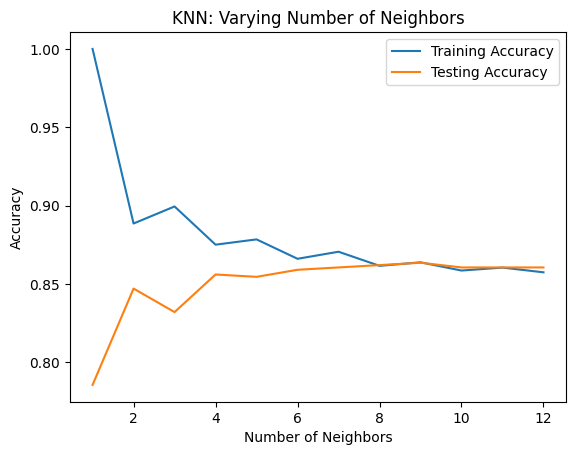

In [6]:
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Introduction to regression

In [7]:
import pandas as pd
diabetes_df = pd.read_csv('./data/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Making prediction using BMI

In [9]:
X_bmi = diabetes_df.drop('glucose', axis=1).loc[:,'bmi'].values
print(y.shape, X_bmi.shape)

(768,) (768,)


In [10]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


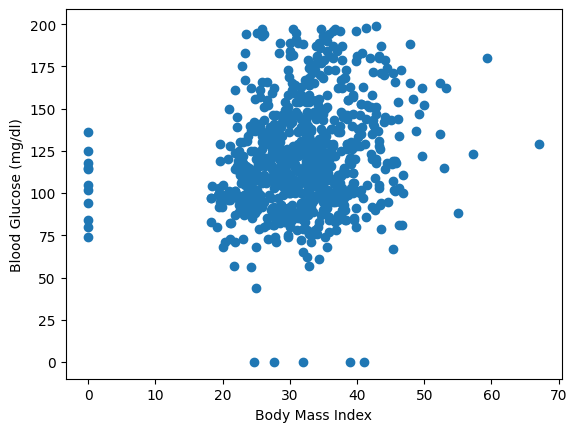

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
plt.show();

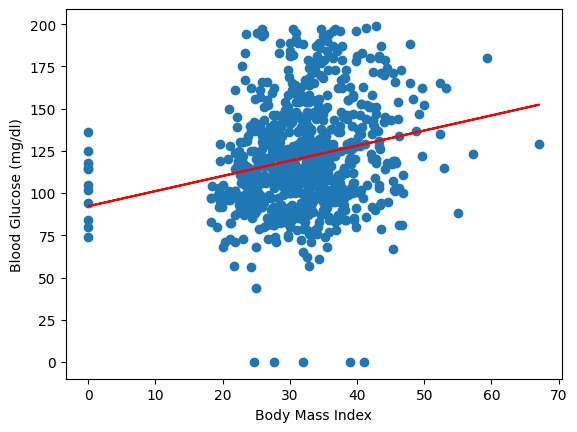

In [12]:
import sklearn.linear_model as sklm
reg = sklm.LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='red')
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
plt.show()

### The basics of linear regression

In [13]:
import sklearn.model_selection as skms
import sklearn.linear_model as sklm

In [14]:
sales_df = pd.read_csv(r'.\data\advertising_and_sales_clean.csv')
sales_df.head(2)

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90


In [15]:
# Create X and y arrays
X = sales_df.drop(["influencer","sales"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test =\
    skms.train_test_split(
        X,
        y,
        test_size=0.3,
        random_state=42
    )

# Instantiate the model
reg = sklm.LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print(f"Predictions: {y_pred[:2]}, Actual Values: { y_test[:2]}")

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [16]:
reg.score(X_test, y_test)

0.9990152104759368

In [17]:
# Import mean_squared_error
import sklearn.metrics as skm

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = skm.mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print(f"R^2: {r_squared}")
print(f"RMSE: {rmse}")

R^2: 0.9990152104759368
RMSE: 2944.4331996001015


### Cross-validation

In [18]:
# Create a KFold object
kf = skms.KFold(n_splits=6, shuffle=True, random_state=5)

reg = sklm.LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = skms.cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [19]:
import numpy as np
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


### Regularized regression

#### Ridge Regression

In [20]:
scores = []
for _ in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridge = sklm.Ridge(alpha=_)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test, y_test))
print(scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387]


#### Lasso Regression

In [21]:
scores = []
for _ in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  lasso = sklm.Lasso(alpha=_)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  scores.append(ridge.score(X_test, y_test))
print(scores)

[0.9990152104764387, 0.9990152104764387, 0.9990152104764387, 0.9990152104764387, 0.9990152104764387]


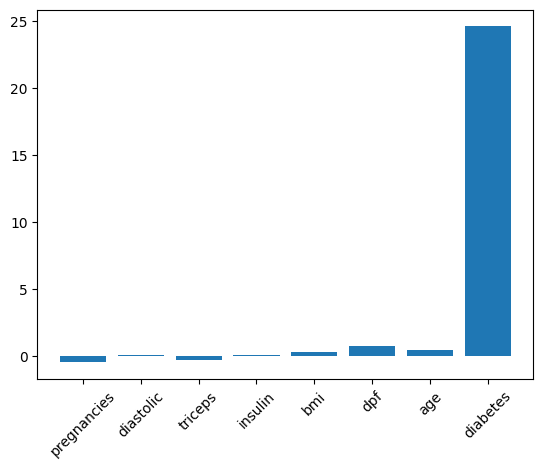

In [22]:
X = diabetes_df.drop(['glucose'], axis=1).values
y = diabetes_df['glucose'].values
x_lables = list(diabetes_df.drop('glucose', axis=1))
lasso = sklm.Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(x_lables, lasso_coef)
plt.xticks(rotation=45)
plt.show();

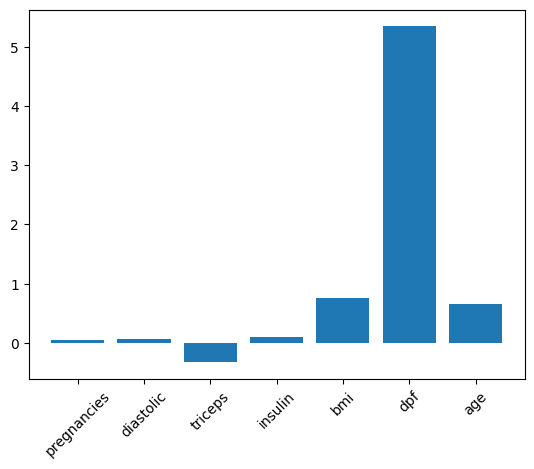

In [23]:
X = diabetes_df.drop(['glucose', 'diabetes'], axis=1).values
y = diabetes_df['glucose'].values
x_lables = list(diabetes_df.drop(['glucose', 'diabetes'], axis=1))
lasso = sklm.Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(x_lables, lasso_coef)
plt.xticks(rotation=45)
plt.show();

## Fine-Tuning Your Model

### How good is your model?

In [24]:
X = diabetes_df[['bmi', 'age']].values
y = diabetes_df['diabetes'].values

In [25]:
X_train, X_test, y_train, y_test =\
    skms.train_test_split(  X,
                            y,
                            test_size=0.4,
                            random_state=42
    )

In [26]:
# Import confusion matrix
import sklearn.metrics as skm
import  sklearn.neighbors as skn

knn = skn.KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(skm.confusion_matrix(y_test, y_pred))
print(skm.classification_report(y_test, y_pred))

[[159  47]
 [ 54  48]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       206
           1       0.51      0.47      0.49       102

    accuracy                           0.67       308
   macro avg       0.63      0.62      0.62       308
weighted avg       0.67      0.67      0.67       308



### Logistic regression and the ROC curve

In [57]:
y_pred = logreg.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [44]:
X_train, X_test, y_train, y_test =\
    skms.train_test_split(  X,
                            y,
                            test_size=0.3,
                            random_state=42
    )

# Import LogisticRegression
# Instantiate the model
logreg = sklm.LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

y_pred = logreg.predict(y_test.reshape(-1, 1))

[0.5070309  0.2621656  0.16851245 0.17314983 0.48962511 0.75732791
 0.06118489 0.5155887  0.3488152  0.77754421]


ValueError: X has 1 features, but LogisticRegression is expecting 2 features as input.

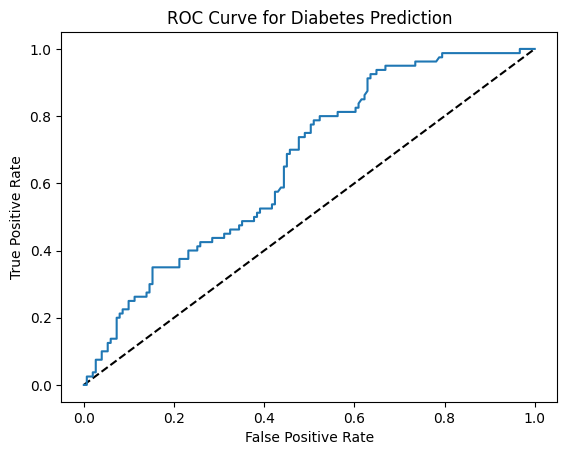

In [46]:
# Import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = skm.roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [52]:
len(y_pred)

308

In [62]:
len(y_pred)

308

In [65]:
# Import roc_auc_score
# Calculate roc_auc_score
print(skm.roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(skm.confusion_matrix(y_test, y_pred[:231]))

# Calculate the classification report
print(skm.classification_report(y_test, y_pred[:231]))

0.6591059602649006
[[112  39]
 [ 46  34]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       151
           1       0.47      0.42      0.44        80

    accuracy                           0.63       231
   macro avg       0.59      0.58      0.58       231
weighted avg       0.62      0.63      0.63       231

